# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
#Libraries for graph visualization
import networkx as nx

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
from network_ad.config import DATA_PATH
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [ ]:
from network_ad.config import RAW_DATA_FILE


def load_data():
    return pd.read_csv(DATA_PATH / RAW_DATA_FILE)

data_df = load_data()


In [ ]:
data_df.head(n=50)

In [ ]:
data_df.info()

In [ ]:
# Number of distinct source IP  and destination IP
print("Number of distinct source IP and destination IP: ", data_df['IPV4_SRC_ADDR'].nunique(), data_df['IPV4_DST_ADDR'].nunique())

## Distribution of number of occurences of each source and destination IP
-------------------------
Note that 75% of source IP appear less than 6 times and 75% of destination IP appear less than 9 times.

In [ ]:

display(data_df['IPV4_SRC_ADDR'].value_counts().describe())
# Distribution of number of occurences of each destination IP
display(data_df['IPV4_DST_ADDR'].value_counts().describe())

## Distribution of labels
-------------------------
We can see that there are 96.4% of normal traffic and 3.6% of malicious traffic.

In [ ]:
#Statistical description of the labels (with absolute values not Frequency)
display(data_df['Label'].value_counts().plot(kind='bar'))

plt.figure(figsize=(10,10))
data_df['Label'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
# distribution of attack types (large PIe chart)
plt.figure(figsize=(10,10))
display(data_df.query('Label != 0')['Attack'].value_counts().plot(kind='bar'))

plt.figure(figsize=(10,10))
data_df.query('Label != 0')['Attack'].value_counts().plot.pie(autopct='%1.1f%%')

## Correlation Analyis

In [ ]:
plt.figure(figsize=(20,20))

sns.heatmap(data_df.corr())

## Top 20 most correlated features with the label

In [ ]:
data_df.corr().abs()['Label'].sort_values(ascending=False).head(20)

In [ ]:
# Nombre de flux ayant la même adresse IP source et adresse IP de destination
data_df.query('IPV4_SRC_ADDR == IPV4_DST_ADDR')

## Protocols in the dataset

In [ ]:
plt.figure(figsize=(10,10))
data_df['PROTOCOL'].value_counts().plot.pie(autopct='%1.1f%%')

## Analysis of subnets ipv4

### Three first octets of the source and destination IP addresses

In [ ]:
data_df['IPV4_SRC_ADDR_OCTET1_3']= data_df['IPV4_SRC_ADDR'].apply(lambda x: '.'.join(x.split('.')[:3]))
data_df['IPV4_DST_ADDR_OCTET1_3']= data_df['IPV4_DST_ADDR'].apply(lambda x: '.'.join(x.split('.')[:3]))

#Statistical description of the source IP addresses
print("Number of distinct source networks: ", data_df['IPV4_SRC_ADDR_OCTET1_3'].nunique())
#Statistical description of the destination IP addresses
print("Number of distinct destination networks ", data_df['IPV4_DST_ADDR_OCTET1_3'].nunique())

#The source and destination networks
print("Source networks: ", data_df['IPV4_SRC_ADDR_OCTET1_3'].unique())
print("Destination networks: ", data_df['IPV4_DST_ADDR_OCTET1_3'].unique())

### Host part of the source and destination IP addresses

In [ ]:
data_df['IPV4_SRC_ADDR_OCTET4']= data_df['IPV4_SRC_ADDR'].apply(lambda x: x.split('.')[-1])
data_df['IPV4_DST_ADDR_OCTET4']= data_df['IPV4_DST_ADDR'].apply(lambda x: x.split('.')[-1])

#Statistical description of the source IP addresses
print("Number of distinct source hosts: ", data_df['IPV4_SRC_ADDR_OCTET4'].nunique())
#Statistical description of the destination IP addresses
print("Number of distinct destination hosts ", data_df['IPV4_DST_ADDR_OCTET4'].nunique())

# The source and destination hosts
print("Source hosts: ", data_df['IPV4_SRC_ADDR_OCTET4'].unique())
print("Destination hosts: ", data_df['IPV4_DST_ADDR_OCTET4'].unique())

### Source and destination ports

In [ ]:
#Statistical description of the source ports
print("Number of distinct source ports: ", data_df['L4_SRC_PORT'].nunique())

#Statistical description of the destination ports
print("Number of distinct destination ports ", data_df['L4_DST_PORT'].nunique())

In [ ]:
# historgram of the source ports
plt.figure(figsize=(10,5))
sns.histplot(data_df['L4_SRC_PORT'])

In [ ]:
# historgram of the destination ports
plt.figure(figsize=(10,5))
# sns.histplot(data_df['L4_DST_PORT'])
# Only port appearl less than 10000 times
#TOp 20 destination ports
sns.histplot(data_df['L4_DST_PORT'].value_counts().head(20))

# sns.histplot(data_df['L4_DST_PORT'].value_counts().loc[lambda x: x < 10000])


### Ports distribution

#### Destination ports

In [ ]:
# Standard ports : 0-1024
print("Number of distinct standard ports: ", data_df.query('L4_DST_PORT <= 1024')['L4_DST_PORT'].nunique())

# Regular ports : 1025-49151
print("Number of distinct regular ports: ", data_df.query('L4_DST_PORT > 1024 and L4_DST_PORT <= 49151')['L4_DST_PORT'].nunique())

# Dynamic ports : 49152-65535
print("Number of distinct dynamic ports: ", data_df.query('L4_DST_PORT > 49151')['L4_DST_PORT'].nunique())


#### Source ports

In [ ]:
# Standard ports : 0-1024
print("Number of distinct standard ports: ", data_df.query('L4_SRC_PORT <= 1024')['L4_SRC_PORT'].nunique())

# Regular ports : 1025-49151
print("Number of distinct regular ports: ", data_df.query('L4_SRC_PORT > 1024 and L4_SRC_PORT <= 49151')['L4_SRC_PORT'].nunique())

# Dynamic ports : 49152-65535
print("Number of distinct dynamic ports: ", data_df.query('L4_SRC_PORT > 49151')['L4_SRC_PORT'].nunique())


## Protocols in the dataset

<AxesSubplot:ylabel='PROTOCOL'>

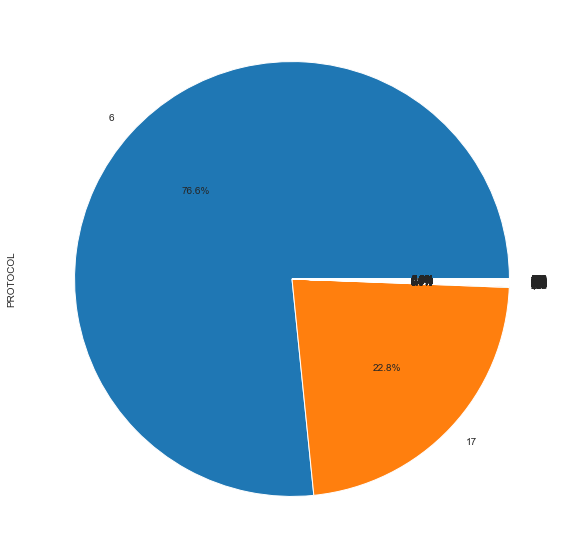

In [31]:
plt.figure(figsize=(10,10))
data_df['PROTOCOL'].value_counts().plot.pie(autopct='%1.1f%%')

## Analysis of subnets ipv4

### Three first octets of the source and destination IP addresses

In [41]:
data_df['IPV4_SRC_ADDR_OCTET1_3']= data_df['IPV4_SRC_ADDR'].apply(lambda x: '.'.join(x.split('.')[:3]))
data_df['IPV4_DST_ADDR_OCTET1_3']= data_df['IPV4_DST_ADDR'].apply(lambda x: '.'.join(x.split('.')[:3]))

#Statistical description of the source IP addresses
print("Number of distinct source networks: ", data_df['IPV4_SRC_ADDR_OCTET1_3'].nunique())
#Statistical description of the destination IP addresses
print("Number of distinct destination networks ", data_df['IPV4_DST_ADDR_OCTET1_3'].nunique())

#The source and destination networks
print("Source networks: ", data_df['IPV4_SRC_ADDR_OCTET1_3'].unique())
print("Destination networks: ", data_df['IPV4_DST_ADDR_OCTET1_3'].unique())

Number of distinct source networks:  7
Number of distinct destination networks  8
Source networks:  ['59.166.0' '175.45.176' '149.171.126' '10.40.85' '10.40.182'
 '192.168.241' '127.0.0']
Destination networks:  ['149.171.126' '59.166.0' '175.45.176' '224.0.0' '192.168.241' '10.40.182'
 '10.40.198' '127.0.0']


### Host part of the source and destination IP addresses

In [42]:
data_df['IPV4_SRC_ADDR_OCTET4']= data_df['IPV4_SRC_ADDR'].apply(lambda x: x.split('.')[-1])
data_df['IPV4_DST_ADDR_OCTET4']= data_df['IPV4_DST_ADDR'].apply(lambda x: x.split('.')[-1])

#Statistical description of the source IP addresses
print("Number of distinct source hosts: ", data_df['IPV4_SRC_ADDR_OCTET4'].nunique())
#Statistical description of the destination IP addresses
print("Number of distinct destination hosts ", data_df['IPV4_DST_ADDR_OCTET4'].nunique())

# The source and destination hosts
print("Source hosts: ", data_df['IPV4_SRC_ADDR_OCTET4'].unique())
print("Destination hosts: ", data_df['IPV4_DST_ADDR_OCTET4'].unique())

Number of distinct source hosts:  21
Number of distinct destination hosts  23
Source hosts:  ['5' '1' '0' '7' '3' '2' '6' '9' '4' '8' '15' '10' '19' '13' '11' '14'
 '17' '12' '18' '16' '243']
Destination hosts:  ['8' '14' '3' '7' '5' '9' '6' '2' '1' '4' '0' '13' '16' '15' '10' '18'
 '17' '11' '12' '19' '50' '255' '243']


### Source and destination ports

In [45]:
#Statistical description of the source ports
print("Number of distinct source ports: ", data_df['L4_SRC_PORT'].nunique())

#Statistical description of the destination ports
print("Number of distinct destination ports ", data_df['L4_DST_PORT'].nunique())

Number of distinct source ports:  64601
Number of distinct destination ports  64625


<AxesSubplot:xlabel='L4_SRC_PORT', ylabel='Count'>

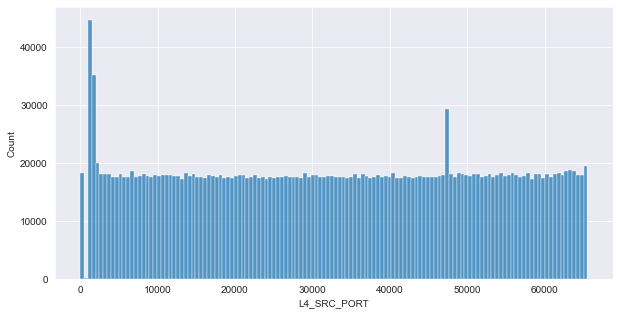

In [50]:
# historgram of the source ports
plt.figure(figsize=(10,5))
sns.histplot(data_df['L4_SRC_PORT'])

<AxesSubplot:xlabel='L4_DST_PORT', ylabel='Count'>

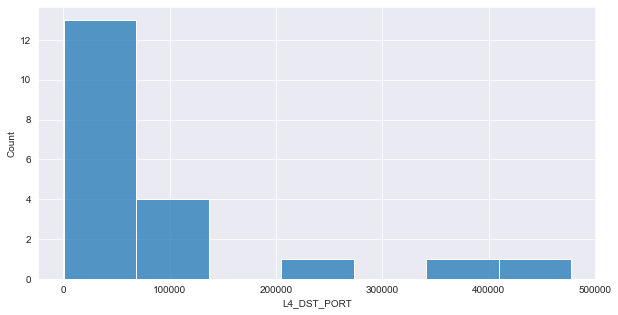

In [57]:
# historgram of the destination ports
plt.figure(figsize=(10,5))
# sns.histplot(data_df['L4_DST_PORT'])
# Only port appearl less than 10000 times
#TOp 20 destination ports
sns.histplot(data_df['L4_DST_PORT'].value_counts().head(20))

# sns.histplot(data_df['L4_DST_PORT'].value_counts().loc[lambda x: x < 10000])


### Ports distribution

#### Destination ports

In [65]:
# Standard ports : 0-1024
print("Number of distinct standard ports: ", data_df.query('L4_DST_PORT <= 1024')['L4_DST_PORT'].nunique())

# Regular ports : 1025-49151
print("Number of distinct regular ports: ", data_df.query('L4_DST_PORT > 1024 and L4_DST_PORT <= 49151')['L4_DST_PORT'].nunique())

# Dynamic ports : 49152-65535
print("Number of distinct dynamic ports: ", data_df.query('L4_DST_PORT > 49151')['L4_DST_PORT'].nunique())


Number of distinct standard ports:  116
Number of distinct regular ports:  48127
Number of distinct dynamic ports:  16382


#### Source ports

In [66]:
# Standard ports : 0-1024
print("Number of distinct standard ports: ", data_df.query('L4_SRC_PORT <= 1024')['L4_SRC_PORT'].nunique())

# Regular ports : 1025-49151
print("Number of distinct regular ports: ", data_df.query('L4_SRC_PORT > 1024 and L4_SRC_PORT <= 49151')['L4_SRC_PORT'].nunique())

# Dynamic ports : 49152-65535
print("Number of distinct dynamic ports: ", data_df.query('L4_SRC_PORT > 49151')['L4_SRC_PORT'].nunique())


Number of distinct standard ports:  90
Number of distinct regular ports:  48127
Number of distinct dynamic ports:  16384
